In [3]:
import sys
import os

# Get the current directory (where the notebook is located)
notebook_dir = os.getcwd()

# Get the path of the parent folder (one level up from the notebook directory)
parent_folder_path = os.path.dirname(notebook_dir)

# Add the parent folder to sys.path
sys.path.append(parent_folder_path)



In [4]:
import matplotlib.pyplot as plt
from visualizations import load_example, load_data_in_range
from helper_functions import plot_interpolated_arrays

In [5]:
s_session = load_example(ind=4)

In [6]:
import os
os.getcwd()

'D:\\Project- Electro\\Predict_Social_Behavior\\src\\utils'

In [7]:
# vector_list[0]

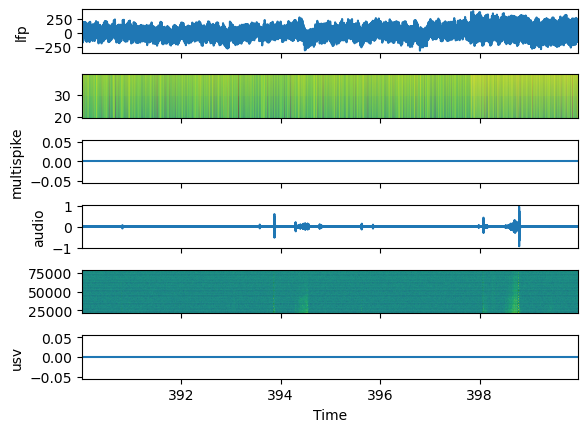

In [8]:

timestamp_array, vector_list, vector_names = load_data_in_range(s_session, time_range=(390, 400), area_name='EA')

spectogram_dict_list = [{'index': 0, 'frequency_range': (1, 50), 'nperseg': 256, 'noverlap': 200,
                         'sampling_rate': s_session.lfp.sampling_rate},
                        {'index': 2, 'frequency_range': (20000, 80000), 'nperseg': 256, 'noverlap': 200,
                         'sampling_rate': s_session.audio.sampling_rate}
                        ]
plot_interpolated_arrays(vector_list, timestamp_array, vector_names,
                                spectogram_dict_list=spectogram_dict_list)
# plot_spectrogram(signal=vector_list[0][0],
#                  sampling_rate=s_session.lfp.sampling_rate,
#                  freq_range=(1,50), window='hann', nperseg=256, noverlap=None,axes=axis[0])
plt.show()


FloatText(value=1.0, description='Step Size:')

Button(description='Forward', style=ButtonStyle())

Button(description='Backward', style=ButtonStyle())

D:\Project- Electro\Predict_Social_Behavior\src\utils\helper_functions.py:101: RuntimeWarning: divide by zero encountered in log10
  ax_spec.pcolormesh(adjusted_timestamps, f, 10 * np.log10(spectrogram_data), shading='gouraud')


<Figure size 1000x600 with 0 Axes>

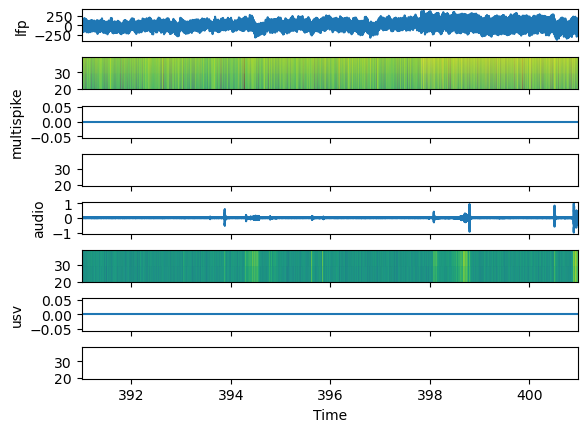

D:\Project- Electro\Predict_Social_Behavior\src\utils\helper_functions.py:101: RuntimeWarning: divide by zero encountered in log10
  ax_spec.pcolormesh(adjusted_timestamps, f, 10 * np.log10(spectrogram_data), shading='gouraud')


<Figure size 1000x600 with 0 Axes>

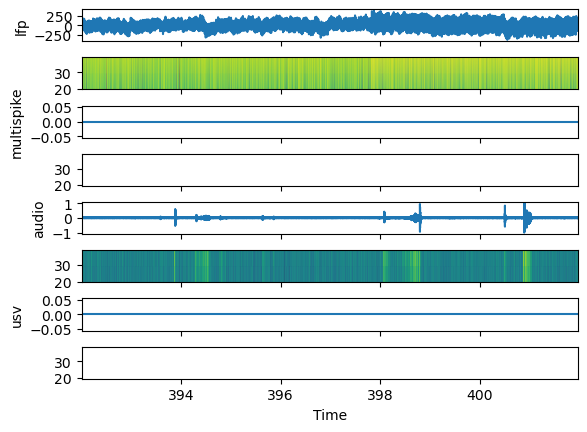

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display

# Import your functions (load_data_in_range, plot_interpolated_arrays, plot_spectrogram) here

# Define global variables for the time range and step size
time_range_start = 390
time_range_end = 400
step_size = 1

# Define a function to update the plot when the range parameters change
def update_plot(time_range_start, time_range_end):
    # Load data with updated time_range
    timestamp_array, vector_list, vector_names = load_data_in_range(s_session, time_range=(time_range_start, time_range_end), area_name='EA')

    # Create the plot with updated data
    plt.figure(figsize=(10, 6))
    spectogram_dict_list = [{'index': i, 'frequency_range': (1, 50), 'nperseg': 256, 'noverlap': 200,
                             'sampling_rate': s_session.lfp.sampling_rate} for i in range(len(vector_list))]
    plot_interpolated_arrays(vector_list, timestamp_array, vector_names, spectogram_dict_list=spectogram_dict_list)
    plt.show()

# Define functions to handle the button clicks
def on_forward_button_click(b):
    global time_range_start, time_range_end
    time_range_start += step_size
    time_range_end += step_size
    time_range_start_slider.value = time_range_start
    time_range_end_slider.value = time_range_end
    update_plot(time_range_start, time_range_end)

def on_backward_button_click(b):
    global time_range_start, time_range_end
    time_range_start -= step_size
    time_range_end -= step_size
    time_range_start_slider.value = time_range_start
    time_range_end_slider.value = time_range_end
    update_plot(time_range_start, time_range_end)

# Define the range sliders, step size box, and buttons, and display them interactively
time_range_start_slider = widgets.FloatSlider(min=380, max=400, step=1, value=time_range_start, description='Start Time:')
time_range_end_slider = widgets.FloatSlider(min=390, max=410, step=1, value=time_range_end, description='End Time:')
step_size_box = widgets.FloatText(value=step_size, description='Step Size:')
forward_button = widgets.Button(description='Forward')
backward_button = widgets.Button(description='Backward')

forward_button.on_click(on_forward_button_click)
backward_button.on_click(on_backward_button_click)

widgets.interactive(update_plot, time_range_start=time_range_start_slider, time_range_end=time_range_end_slider)
display(step_size_box, forward_button, backward_button)
